In [83]:
import findspark

In [84]:
findspark.init()

In [85]:
from pyspark import SparkContext, SQLContext
from pyspark.sql import SparkSession

In [86]:
spark = (
    SparkSession.builder
    .appName("analysis")
    .getOrCreate()
)

In [87]:
df = (
    spark.read
    .option("header", "true")
    .option("inferschema", "true")
    .csv('hdfs://localhost:8020/user/tytkowskid/joined_data.csv')
)
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- timestamp: double (nullable = true)
 |-- rok: integer (nullable = true)
 |-- mc: integer (nullable = true)
 |-- d: integer (nullable = true)
 |-- odjazd_x: string (nullable = true)
 |-- odjazd_y: string (nullable = true)
 |-- diff: double (nullable = true)
 |-- nazwa_trasy: string (nullable = true)
 |-- typ: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- tmax: double (nullable = true)
 |-- tmin: double (nullable = true)
 |-- tmean: double (nullable = true)
 |-- opad_num: double (nullable = true)
 |-- opad_rodz: string (nullable = true)
 |-- snieg: double (nullable = true)



In [88]:
df.show()

+---+--------------------+----+---+---+--------+--------+-----+-----------+---+--------+----+----+-----+--------+---------+-----+
|_c0|           timestamp| rok| mc|  d|odjazd_x|odjazd_y| diff|nazwa_trasy|typ|    date|tmax|tmin|tmean|opad_num|opad_rodz|snieg|
+---+--------------------+----+---+---+--------+--------+-----+-----------+---+--------+----+----+-----+--------+---------+-----+
|  0|        2.0220902E15|2022|  9|  2|05:15:00|05:16:50|110.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|
|  1|2.022090200000001E15|2022|  9|  2|05:17:00|05:17:10|-10.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|
|  2|2.022090200000002E15|2022|  9|  2|05:19:00|05:20:50| 90.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|
|  3|2.022090200000003E15|2022|  9|  2|05:21:00|05:22:20| 35.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|
|  4|2.022090200000004E15|2022|  9|  2|05:22:00|05:23:20| 65.0|          1|  0|20220902|21

24/01/18 22:39:36 WARN csv.CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , timestamp, rok, mc, d, odjazd_x, odjazd_y, diff, nazwa_trasy, typ, date, tmax, tmin, tmean, opad_num, opad_rodz, snieg
 Schema: _c0, timestamp, rok, mc, d, odjazd_x, odjazd_y, diff, nazwa_trasy, typ, date, tmax, tmin, tmean, opad_num, opad_rodz, snieg
Expected: _c0 but found: 
CSV file: hdfs://localhost:8020/user/tytkowskid/joined_data.csv


# Analizy

In [116]:
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Spóźnienia po godzinie

In [108]:
df_hour = df.withColumn("hour", substring('odjazd_x', 1,2).cast(IntegerType()))

In [109]:
df_hour.show()

+---+--------------------+----+---+---+--------+--------+-----+-----------+---+--------+----+----+-----+--------+---------+-----+----+
|_c0|           timestamp| rok| mc|  d|odjazd_x|odjazd_y| diff|nazwa_trasy|typ|    date|tmax|tmin|tmean|opad_num|opad_rodz|snieg|hour|
+---+--------------------+----+---+---+--------+--------+-----+-----------+---+--------+----+----+-----+--------+---------+-----+----+
|  0|        2.0220902E15|2022|  9|  2|05:15:00|05:16:50|110.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|   5|
|  1|2.022090200000001E15|2022|  9|  2|05:17:00|05:17:10|-10.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|   5|
|  2|2.022090200000002E15|2022|  9|  2|05:19:00|05:20:50| 90.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|   5|
|  3|2.022090200000003E15|2022|  9|  2|05:21:00|05:22:20| 35.0|          1|  0|20220902|21.7|10.4| 15.5|     0.0|   nodata|  0.0|   5|
|  4|2.022090200000004E15|2022|  9|  2|05:22:00|05:23:2

24/01/18 22:43:17 WARN csv.CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , timestamp, rok, mc, d, odjazd_x, odjazd_y, diff, nazwa_trasy, typ, date, tmax, tmin, tmean, opad_num, opad_rodz, snieg
 Schema: _c0, timestamp, rok, mc, d, odjazd_x, odjazd_y, diff, nazwa_trasy, typ, date, tmax, tmin, tmean, opad_num, opad_rodz, snieg
Expected: _c0 but found: 
CSV file: hdfs://localhost:8020/user/tytkowskid/joined_data.csv


In [110]:
df_hour_grouped = df_hour.groupBy('hour').agg(avg("diff").alias("delay"))
df_hour_grouped.show()

+----+-------------------+
|hour|              delay|
+----+-------------------+
|  12|  119.9783388429752|
|  22|  47.19139416241532|
|  13| 131.00383070167243|
|   6| 54.567670230725945|
|  16| 483.49467296554724|
|   3|  22.35195530726257|
|  20|  79.79977798551063|
|   5| 46.449673821775356|
|  19| 122.28518840431515|
|  15| 230.51624833272706|
|   9|  238.1695917309915|
|  17|  472.1573939526644|
|   4| 29.792308866168167|
|   8| 250.49265010066466|
|  23|  27.49342599549211|
|   7|  123.5007603668574|
|  10| 162.36232111208903|
|  24|-119.97260273972603|
|  21|   73.1463406453344|
|  11| 120.49893788974563|
+----+-------------------+
only showing top 20 rows



In [111]:
temp_df = df_hour_grouped.toPandas()
temp_df.sort_values('hour',inplace=True)
temp_df['delay'] = temp_df['delay']/60

In [112]:
#fig, ax = plt.subplots()

#ax.bar(temp_df['hour'], temp_df['delay'])

#ax.set_ylabel('Godzina')
#ax.set_title('Opóźnienie (w minutach)')

#plt.show()

Text(0.5, 1.0, 'Opóźnienie w zależności od godziny')

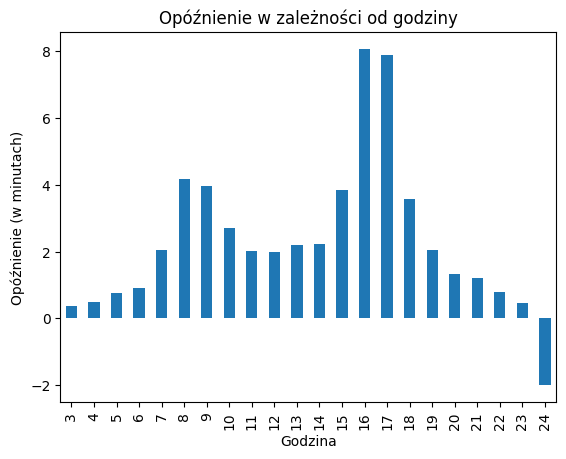

In [113]:
ax = temp_df.plot(kind='bar', x='hour', y='delay')
ax.set_xlabel("Godzina")
ax.set_ylabel("Opóźnienie (w minutach)")
ax.get_legend().remove()
ax.set_title("Opóźnienie w zależności od godziny")

## Opóźnienie od deszczu

In [96]:
df_deszcz = df.groupBy('opad_num').agg(avg("diff").alias("delay"))
temp_df = df_deszcz.toPandas()
temp_df.sort_values('opad_num',inplace=True)
temp_df['delay'] = temp_df['delay']/60

Text(0.5, 1.0, 'Opóźnienie w zależności od opadów')

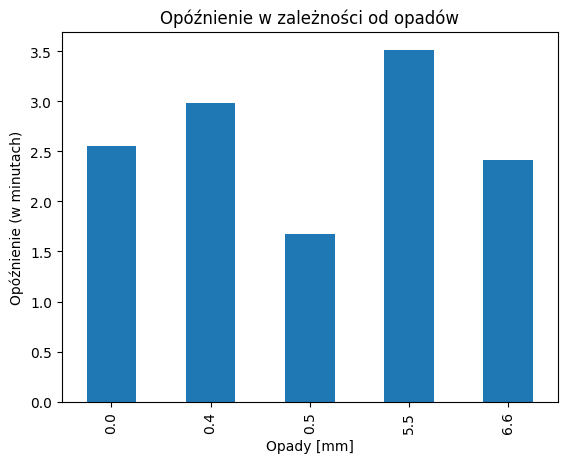

In [97]:
ax = temp_df.plot(kind='bar', x='opad_num', y='delay')
ax.set_xlabel("Opady [mm]")
ax.set_ylabel("Opóźnienie (w minutach)")
ax.get_legend().remove()
ax.set_title("Opóźnienie w zależności od opadów")

## Opóźnienia po linii

In [98]:
df_route = df.groupBy('nazwa_trasy').agg(avg("diff").alias("delay"))
temp_df = df_route.toPandas()
temp_df['delay'] = temp_df['delay']/60
temp_df.sort_values('delay',inplace=True)

In [99]:
temp_df_1 = temp_df.head(5)
temp_df_2 = temp_df.tail(5)
temp_df = pd.concat([temp_df_1, temp_df_2])

Text(0.5, 1.0, 'Trasy z najmniejszym i największym średnim opóźnieniem')

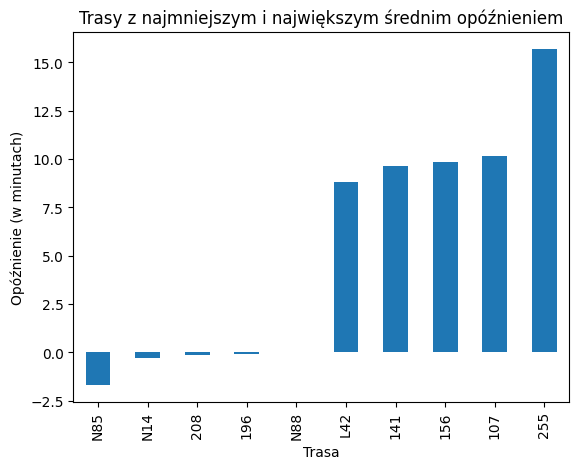

In [100]:
ax = temp_df.plot(kind='bar', x='nazwa_trasy', y='delay')
ax.set_xlabel("Trasa")
ax.set_ylabel("Opóźnienie (w minutach)")
ax.get_legend().remove()
ax.set_title("Trasy z najmniejszym i największym średnim opóźnieniem")

## Opóźnienie od średniej temperatury

In [101]:
df_tmean = df.groupBy('tmean').agg(avg("diff").alias("delay"))
temp_df = df_tmean.toPandas()
temp_df['delay'] = temp_df['delay']/60
temp_df.sort_values('tmean',inplace=True)

Text(0.5, 1.0, 'Opóźnienie w zależności od średniej temperatury dziennej')

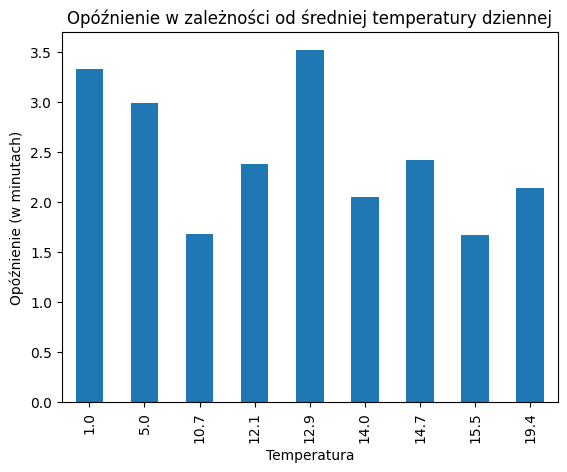

In [102]:
ax = temp_df.plot(kind='bar', x='tmean', y='delay')
ax.set_xlabel("Temperatura")
ax.set_ylabel("Opóźnienie (w minutach)")
ax.get_legend().remove()
ax.set_title("Opóźnienie w zależności od średniej temperatury dziennej")

## Od max temp

In [103]:
df_tmax = df.groupBy('tmax').agg(avg("diff").alias("delay"))
temp_df = df_tmax.toPandas()
temp_df['delay'] = temp_df['delay']/60
temp_df.sort_values('tmax',inplace=True)

Text(0.5, 1.0, 'Opóźnienie w zależności od maksymalnej temperatury dziennej')

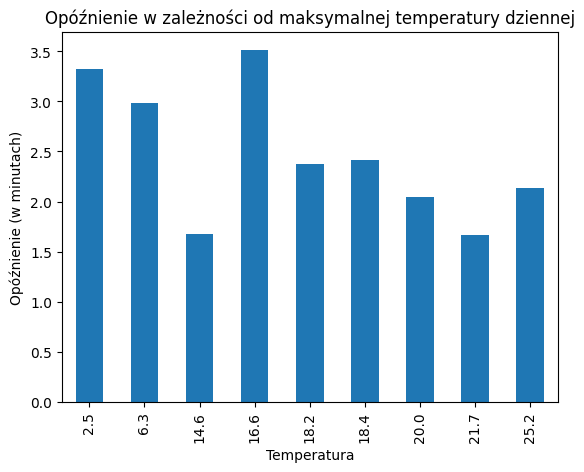

In [104]:
ax = temp_df.plot(kind='bar', x='tmax', y='delay')
ax.set_xlabel("Temperatura")
ax.set_ylabel("Opóźnienie (w minutach)")
ax.get_legend().remove()
ax.set_title("Opóźnienie w zależności od maksymalnej temperatury dziennej")

## Od min temp

In [105]:
df_tmin = df.groupBy('tmin').agg(avg("diff").alias("delay"))
temp_df = df_tmin.toPandas()
temp_df['delay'] = temp_df['delay']/60
temp_df.sort_values('tmin',inplace=True)

Text(0.5, 1.0, 'Opóźnienie w zależności od minimalnej temperatury dziennej')

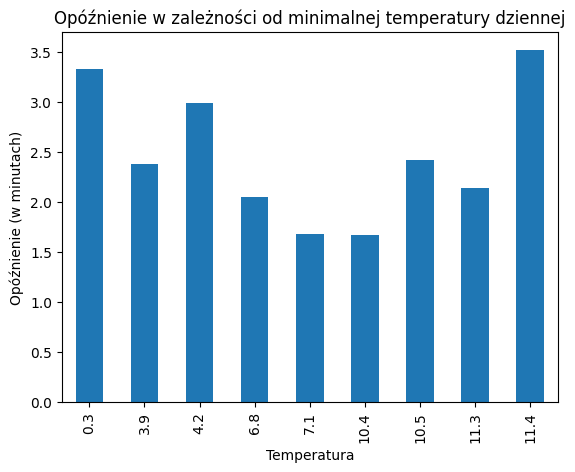

In [106]:
ax = temp_df.plot(kind='bar', x='tmin', y='delay')
ax.set_xlabel("Temperatura")
ax.set_ylabel("Opóźnienie (w minutach)")
ax.get_legend().remove()
ax.set_title("Opóźnienie w zależności od minimalnej temperatury dziennej")